In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# part a

In [5]:
nasir_and_wives = cv.imread('P1/nasir_and_wives.png')
nasir_and_wives = cv.cvtColor(nasir_and_wives, cv.COLOR_BGR2GRAY)

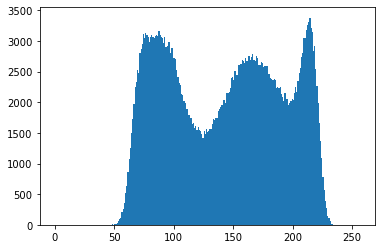

In [3]:
plt.hist(nasir_and_wives.ravel(),256,[0,256])
plt.show()

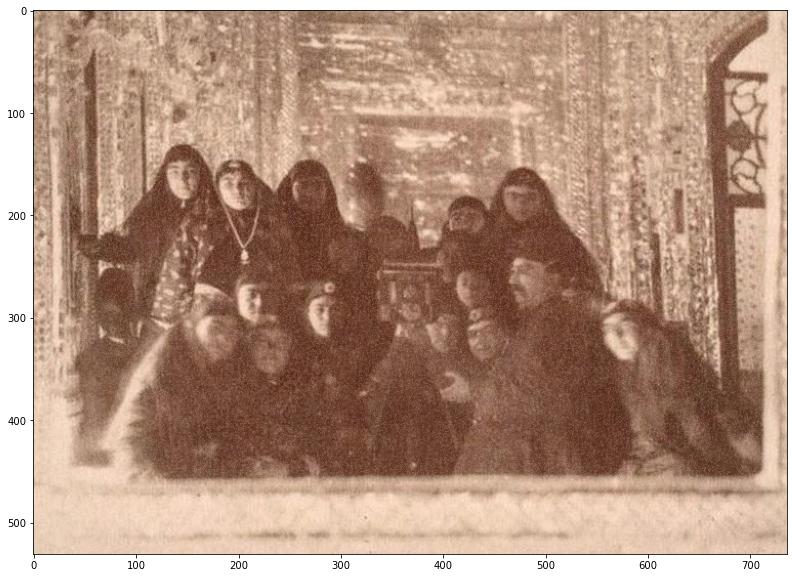

In [11]:
nasir_and_wives = cv.imread('P1/nasir_and_wives.png')
nasir_and_wives = cv.cvtColor(nasir_and_wives, cv.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(nasir_and_wives)

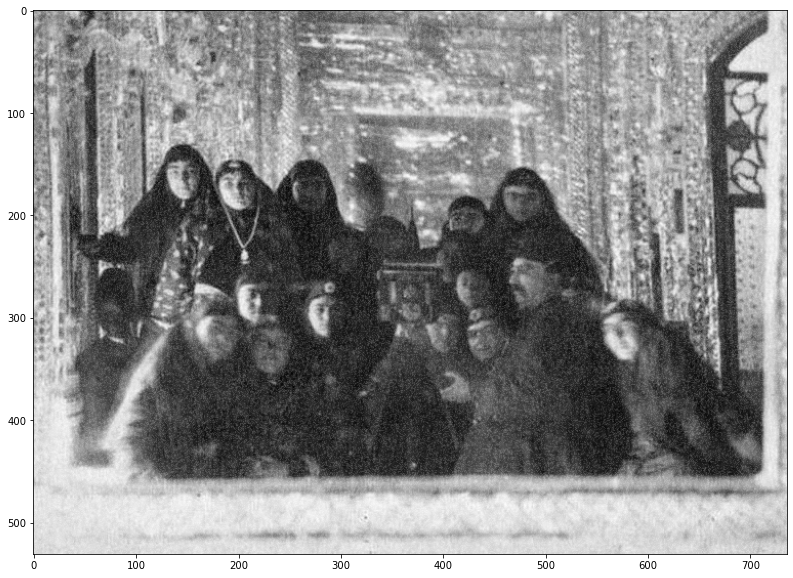

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(nasir_and_wives,cmap='gray')

In [5]:
def normalize(image):
    return (image-image.min())/(image.max()-image.min())

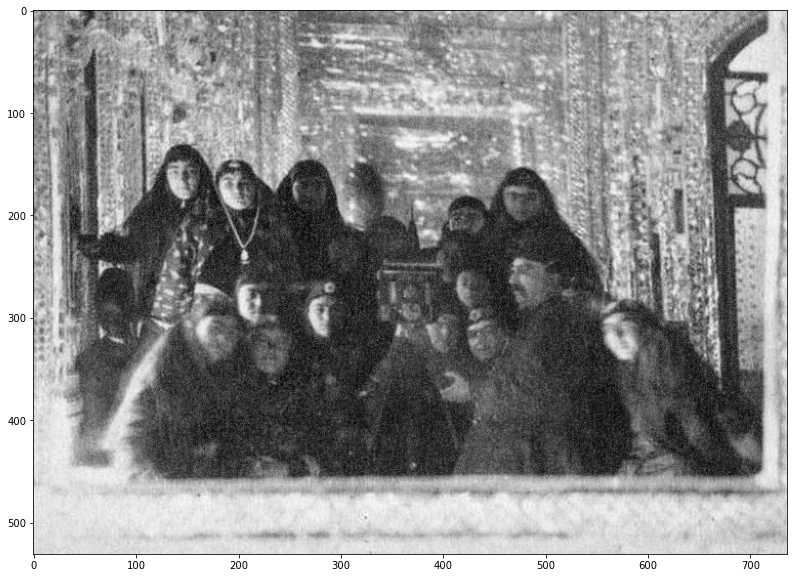

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(normalize(nasir_and_wives),cmap='gray')

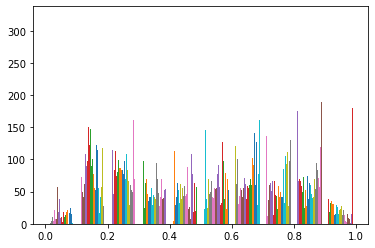

In [7]:
plt.hist(normalize(nasir_and_wives))
plt.show()

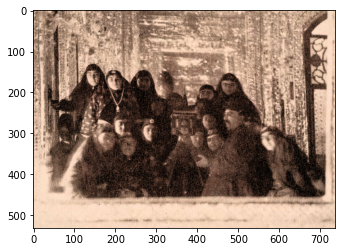

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import imageio
import scipy, scipy.misc, scipy.signal
import cv2
import sys

def build_is_hist(img):
    hei = img.shape[0]
    wid = img.shape[1]
    ch = img.shape[2]
    Img = np.zeros((hei+4, wid+4, ch))
    for i in range(ch):
        Img[:,:,i] = np.pad(img[:,:,i], (2,2), 'edge')
    hsv = (matplotlib.colors.rgb_to_hsv(Img))
    hsv[:,:,0] = hsv[:,:,0] * 255
    hsv[:,:,1] = hsv[:,:,1] * 255
    hsv[hsv>255] = 255
    hsv[hsv<0] = 0
    hsv = hsv.astype(np.uint8).astype(np.float64)
    fh = np.array([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]])
    fv = fh.conj().T
    
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    I = hsv[:,:,2]

    dIh = scipy.signal.convolve2d(I, np.rot90(fh, 2), mode='same')
    dIv = scipy.signal.convolve2d(I, np.rot90(fv, 2), mode='same')
    dIh[dIh==0] = 0.00001
    dIv[dIv==0] = 0.00001
    dI = np.sqrt(dIh**2+dIv**2).astype(np.uint32)
    di = dI[2:hei+2,2:wid+2]
    
    dSh = scipy.signal.convolve2d(S, np.rot90(fh, 2), mode='same')
    dSv = scipy.signal.convolve2d(S, np.rot90(fv, 2), mode='same')
    dSh[dSh==0] = 0.00001
    dSv[dSv==0] = 0.00001
    dS = np.sqrt(dSh**2+dSv**2).astype(np.uint32)
    ds = dS[2:hei+2,2:wid+2]

    
    h = H[2:hei+2,2:wid+2]
    s = S[2:hei+2,2:wid+2]
    i = I[2:hei+2,2:wid+2].astype(np.uint8)
    
    Imean = scipy.signal.convolve2d(I,np.ones((5,5))/25, mode='same')
    Smean = scipy.signal.convolve2d(S,np.ones((5,5))/25, mode='same')
    
    Rho = np.zeros((hei+4,wid+4))
    for p in range(2,hei+2):
        for q in range(2,wid+2):
            tmpi = I[p-2:p+3,q-2:q+3]
            tmps = S[p-2:p+3,q-2:q+3]
            corre = np.corrcoef(tmpi.flatten('F'),tmps.flatten('F'))
            Rho[p,q] = corre[0,1]
    
    rho = np.abs(Rho[2:hei+2,2:wid+2])
    rho[np.isnan(rho)] = 0
    rd = (rho*ds).astype(np.uint32)
    Hist_I = np.zeros((256,1))
    Hist_S = np.zeros((256,1))
    
    for n in range(0,255):
        temp = np.zeros(di.shape)
        temp[i==n] = di[i==n]
        Hist_I[n+1] = np.sum(temp.flatten('F'))
        temp = np.zeros(di.shape)
        temp[i==n] = rd[i==n]
        Hist_S[n+1] = np.sum(temp.flatten('F'))

    return Hist_I, Hist_S

def dhe(img, alpha=0.5):
    
    hist_i, hist_s = build_is_hist(img)
    hist_c = alpha*hist_s + (1-alpha)*hist_i
    hist_sum = np.sum(hist_c)
    hist_cum = hist_c.cumsum(axis=0)
    
    hsv = matplotlib.colors.rgb_to_hsv(img)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    i = hsv[:,:,2].astype(np.uint8)
    
    c = hist_cum / hist_sum
    s_r = (c * 255)
    i_s = np.zeros(i.shape)
    for n in range(0,255):
        i_s[i==n] = s_r[n+1]/255.0
    i_s[i==255] = 1
    hsi_o = np.stack((h,s,i_s), axis=2)
    result = matplotlib.colors.hsv_to_rgb(hsi_o)
    
    result = result * 255
    result[result>255] = 255
    result[result<0] = 0
    return result.astype(np.uint8)



nasir_and_wives = cv.imread('P1/nasir_and_wives.png')
nasir_and_wives = cv.cvtColor(nasir_and_wives, cv.COLOR_BGR2RGB)
result = dhe(nasir_and_wives)


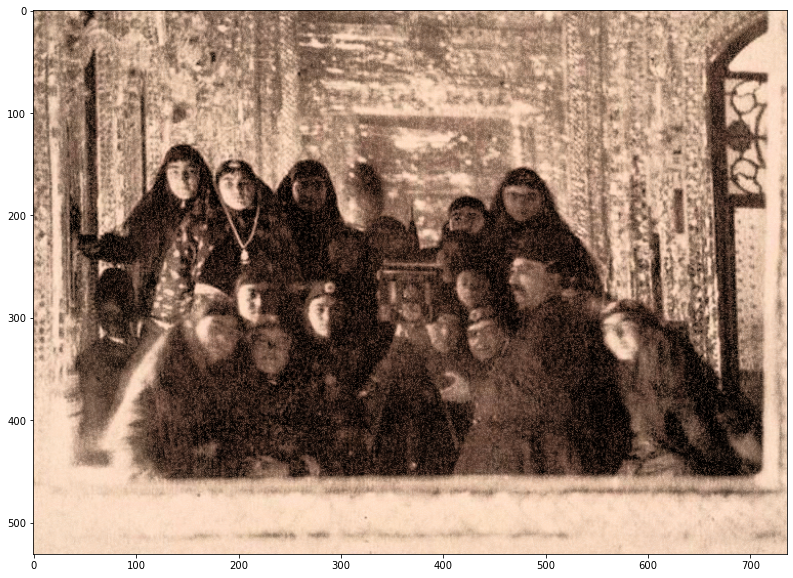

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(result)

# part b

In [5]:
nasir_and_dentist = cv.imread('P1/nasir_and_dentist.png')
nasir_and_dentist = cv.cvtColor(nasir_and_dentist, cv.COLOR_BGR2GRAY)

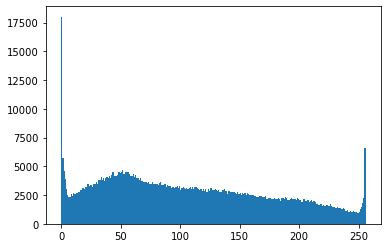

In [35]:
plt.hist(nasir_and_dentist.ravel(),256,[0,256])
plt.show()

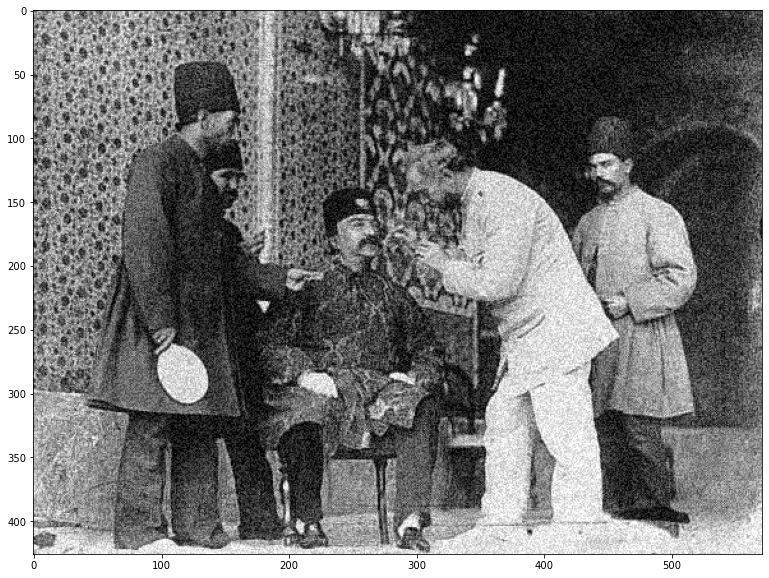

In [9]:
plt.figure(figsize=(20,10))
plt.imshow(nasir_and_dentist)

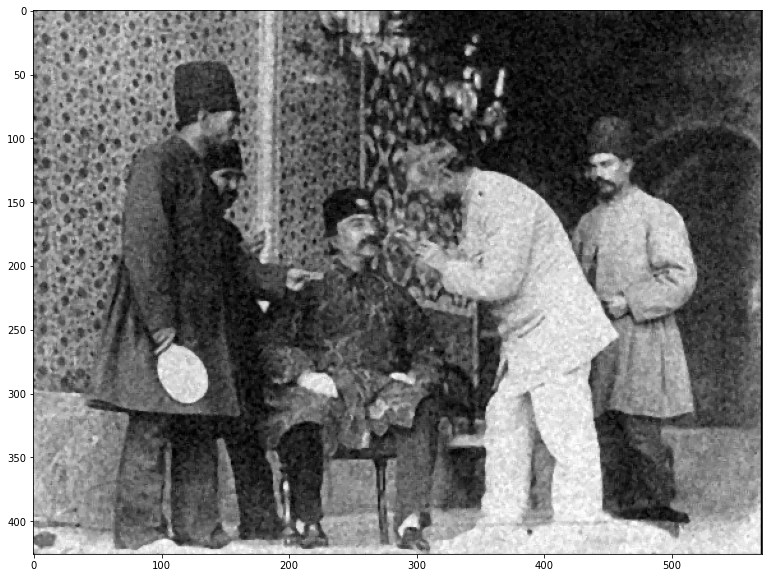

In [37]:
import numpy
from PIL import Image

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final



img = Image.open('P1/nasir_and_dentist.png').convert("L")
arr = numpy.array(img)
removed_noise = median_filter(arr, 3) 
laplacian = cv.Laplacian(removed_noise,cv.CV_64F)
img = Image.fromarray(removed_noise)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')


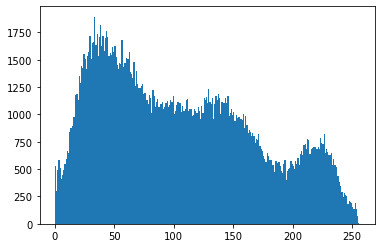

In [39]:
plt.hist(removed_noise.ravel(),256,[0,256]); plt.show()

# part c

In [3]:
nasir_receiving_pachekhari = cv.imread('P1/nasir_receiving_pachekhari.png')
nasir_receiving_pachekhari = cv.cvtColor(nasir_receiving_pachekhari, cv.COLOR_BGR2GRAY)

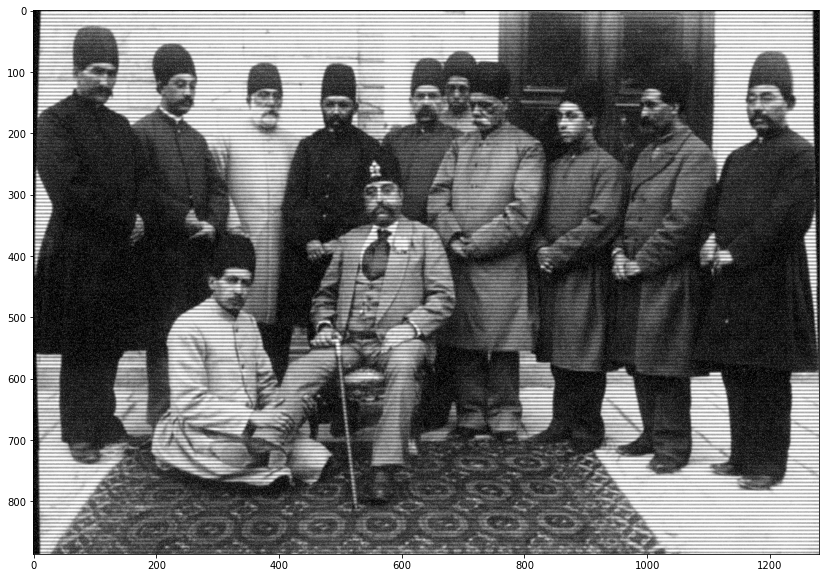

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(nasir_receiving_pachekhari,cmap='gray')

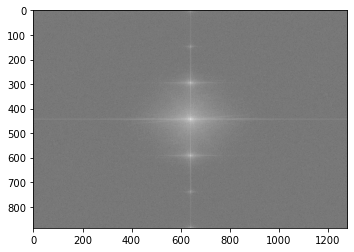

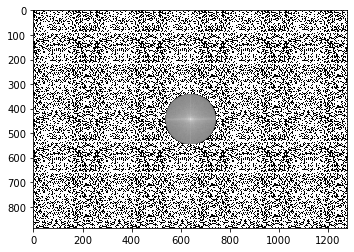

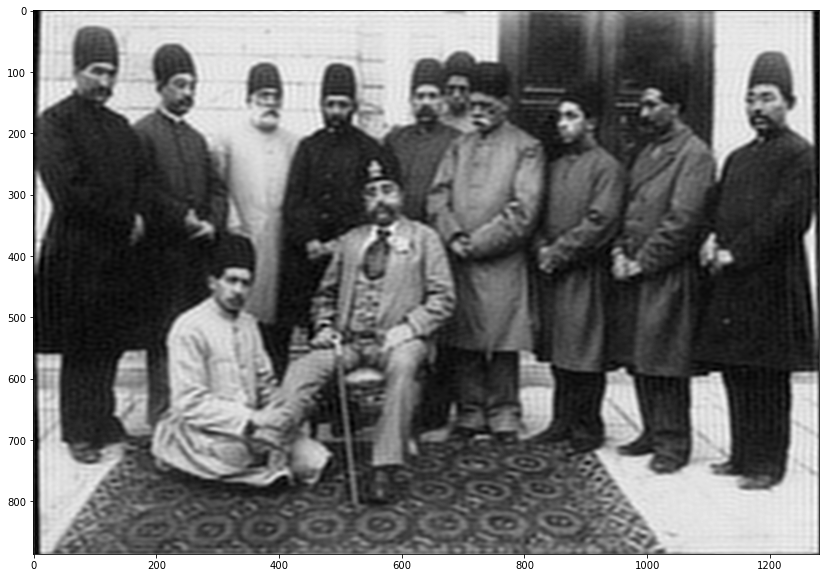

In [25]:
def _low_pass_filter(radius, final_shape, show_imgs=False):
    filt = np.zeros((radius, radius))

    # Create circle mask (pad later)
    for x in range(radius):
        for y in range(radius):
            if (radius//2 - x)**2 + (radius//2 - y)**2 < (radius//2)**2:
                filt[x][y] = 1

    if show_imgs:
        print(filt.shape)
        plt.imshow(filt, cmap='gray')
        plt.show()

    # Calculate padding shape (rows)
    aux1 = final_shape[0] - filt.shape[0]
    if(aux1 % 2 == 0): # even vs odd problem
        pad_cols = ( (final_shape[0] - filt.shape[0])//2, \
                    (final_shape[0] - filt.shape[0])//2)
    else:
        pad_rows = ( (final_shape[0] - filt.shape[0])//2+1, \
                     (final_shape[0] - filt.shape[0])//2+1 )

    # Calculate padding shape (cols)
    aux2 = final_shape[1] - filt.shape[1]
    if(aux2 % 2 == 0):
        pad_cols = ( (final_shape[1] - filt.shape[1])//2, \
                     (final_shape[1] - filt.shape[1])//2)
    else:
        pad_cols = ( (final_shape[1] - filt.shape[1])//2+1, \
                     (final_shape[1] - filt.shape[1])//2+1)

    pad_shape = (pad_rows, pad_cols)

    # Apply padding
    filt = np.pad(filt, pad_shape, 'constant', constant_values=0)
    if(aux1 % 2 != 0 and aux2 % 2 != 0):
        filt = filt[0:filt.shape[0]-1, 0:filt.shape[1]-1]
    elif(aux1 % 2 != 0 and aux2 % 2 == 0):
        filt = filt[0:filt.shape[0]-1, 0:filt.shape[1]]
    elif(aux1 % 2 == 0 and aux2 % 2 != 0):
        filt = filt[0:filt.shape[0], 0:filt.shape[1]-1]

    if show_imgs:
        print(filt.shape)
        plt.imshow(filt, cmap='gray')
        plt.show()

    return filt
def low_pass(img, radius=201, show_imgs=False):
    """
    Filters image using low pass filter in Fourier domain
    Returns filtered image
    """

    img_fft = fftn(img)
    img_fft_shift = fftshift(img_fft)

    # Print spectrum before filtering
    if show_imgs:
        plt.imshow(np.abs(img_fft_shift), cmap='gray', norm=LogNorm(vmin=5))
        plt.show()

    filter_mask = _low_pass_filter(radius, img.shape)

    img_fft_shift_filtered = img_fft_shift * filter_mask

    # Print spectrum after filtering
    if show_imgs:
        plt.imshow(np.abs(img_fft_shift_filtered), cmap='gray', norm=LogNorm(vmin=5))
        plt.show()

    # Generate result image
    return ifftn(fftshift(img_fft_shift_filtered))

restored_gray = low_pass(nasir_receiving_pachekhari, show_imgs=True)

plt.figure(figsize=(20,10))
plt.imshow(np.abs(restored_gray), cmap='gray')


# part d

In [26]:
nasir_smoking_hookah = cv.imread('P1/nasir_smoking_hookah.png')
nasir_smoking_hookah = cv.cvtColor(nasir_smoking_hookah, cv.COLOR_BGR2GRAY)

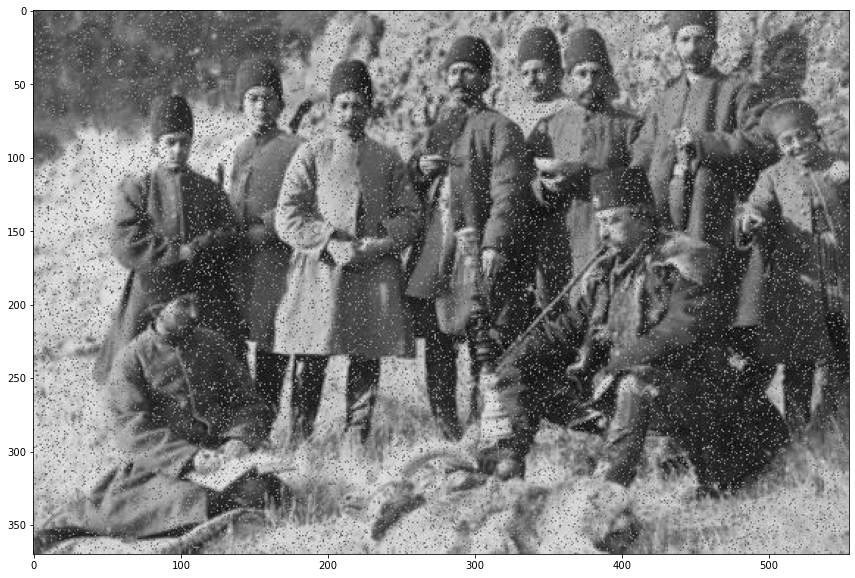

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(nasir_smoking_hookah,cmap='gray')

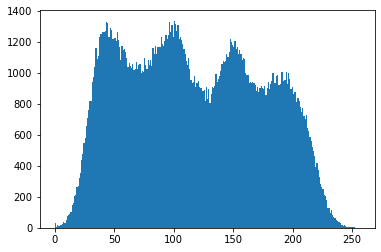

In [28]:
plt.hist(nasir_smoking_hookah.ravel(),256,[0,256])
plt.show()

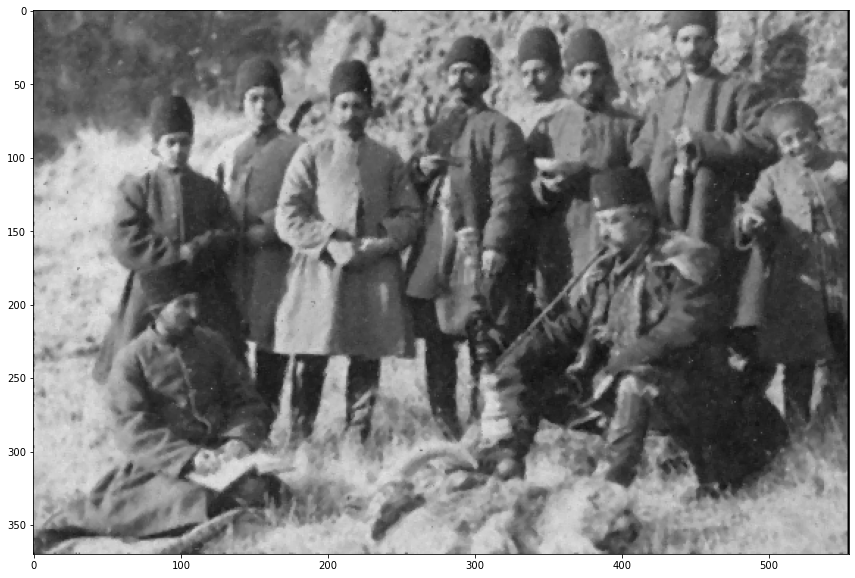

In [29]:
import numpy
from PIL import Image

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final



img = Image.open('P1/nasir_smoking_hookah.png').convert("L")
arr = numpy.array(img)
removed_noise = median_filter(arr, 3) 
img = Image.fromarray(removed_noise)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')
